In [ ]:
# INF2178 Assignment 3
# Student Name: Songjia Liu
# Student Number: 1005137503

In [ ]:
# Data uploading

In [2]:
# Import packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
%pip install dfply
from dfply import *
%pip install pingouin
from pingouin import ancova

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=050d532b8b4f53242cef5945669795af02057339107acdfc608304f974f6f000
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.5 MB/s eta 0:00:00


In [3]:
# Load data file
from google.colab import drive
drive. mount('/drive',force_remount = True)
df = pd.read_excel('/drive/MyDrive/INF2178_A3_data.xlsx')
df.head(10)

Mounted at /drive


,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2
5,50.45,36.27,33.352,64.13,53.31,32.703,150000.0,150.0,3
6,32.49,20.82,26.211,38.52,29.09,29.612,42000.0,42.0,2
7,33.30,26.85,27.072,36.72,32.22,33.730,70000.0,70.0,3
8,65.92,47.36,33.514,84.61,59.89,42.359,100000.0,100.0,3
9,34.20,22.27,28.096,39.87,27.44,32.374,78000.0,78.0,3


In [ ]:
# Data cleaning

In [5]:
df.info()
# We find that the data type of incomegroup is int, not categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


In [6]:
# Change incomegroup's data type from "int" to "categorical"
df['incomegroup'] = df['incomegroup'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   fallreadingscore             11933 non-null  float64 
 1   fallmathscore                11933 non-null  float64 
 2   fallgeneralknowledgescore    11933 non-null  float64 
 3   springreadingscore           11933 non-null  float64 
 4   springmathscore              11933 non-null  float64 
 5   springgeneralknowledgescore  11933 non-null  float64 
 6   totalhouseholdincome         11933 non-null  float64 
 7   incomeinthousands            11933 non-null  float64 
 8   incomegroup                  11933 non-null  category
dtypes: category(1), float64(8)
memory usage: 757.7 KB


In [7]:
# Select columns that are needed
filter_columns = ['fallreadingscore','fallmathscore','fallgeneralknowledgescore','springreadingscore','springmathscore',
                    'springgeneralknowledgescore','incomegroup']
df_clean = df[filter_columns]
df_clean.head(10)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,3
1,50.82,44.44,38.147,83.50,58.93,37.409,3
2,40.68,28.57,28.108,40.41,32.81,29.312,3
3,32.57,23.57,15.404,34.14,35.25,27.382,2
4,31.98,19.65,18.727,32.84,23.60,26.977,2
5,50.45,36.27,33.352,64.13,53.31,32.703,3
6,32.49,20.82,26.211,38.52,29.09,29.612,2
7,33.30,26.85,27.072,36.72,32.22,33.730,3
8,65.92,47.36,33.514,84.61,59.89,42.359,3
9,34.20,22.27,28.096,39.87,27.44,32.374,3


In [8]:
# Check whether there are missing values in dataset
null_counts = df_clean.isnull().sum()
null_counts
# We can see there is no nulls

fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
incomegroup                    0
dtype: int64

In [ ]:
# EDA

In [9]:
 # Generate the summary statistics of columns
 df_clean.describe()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000


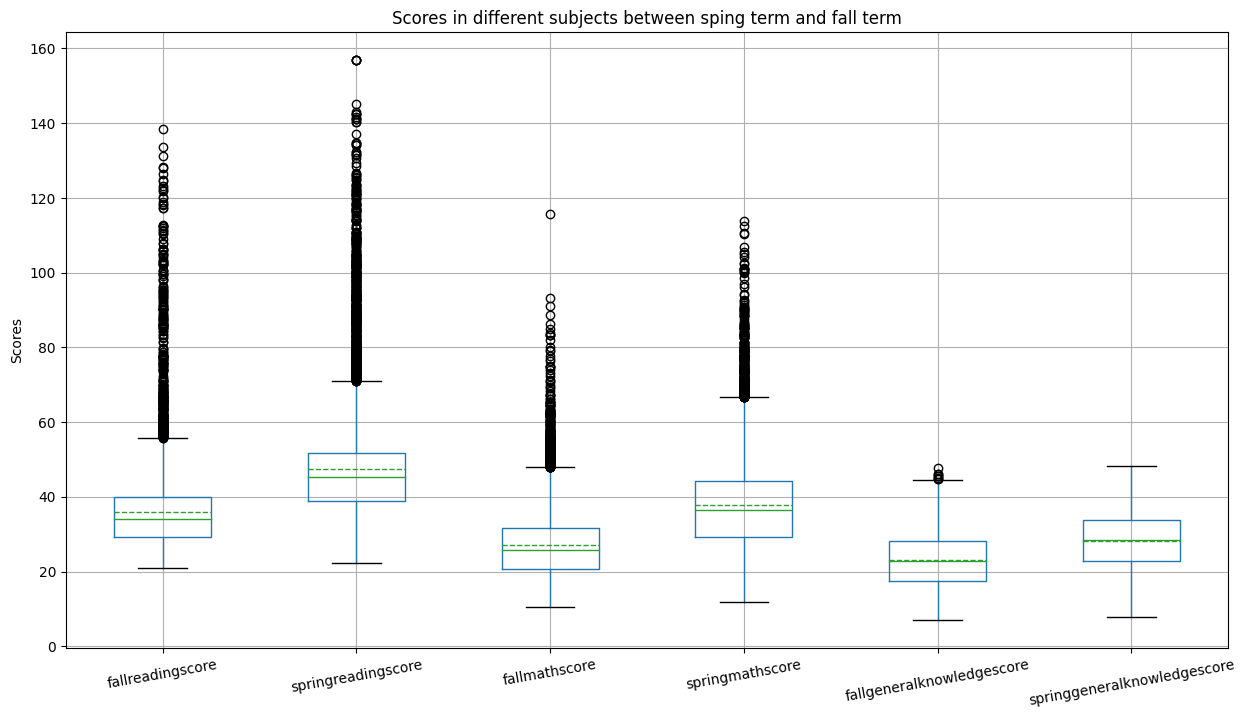

In [10]:
# Create boxplot for the scores in different subjects between sping term and fall term
plt.figure(figsize=(15, 8))

df_clean.boxplot(column=['fallreadingscore', 'springreadingscore', 'fallmathscore', 'springmathscore',
                 'fallgeneralknowledgescore', 'springgeneralknowledgescore'],showmeans = True, meanline = True)

plt.title('Scores in different subjects between sping term and fall term')
plt.ylabel('Scores')
plt.xticks(rotation=10)
plt.show()

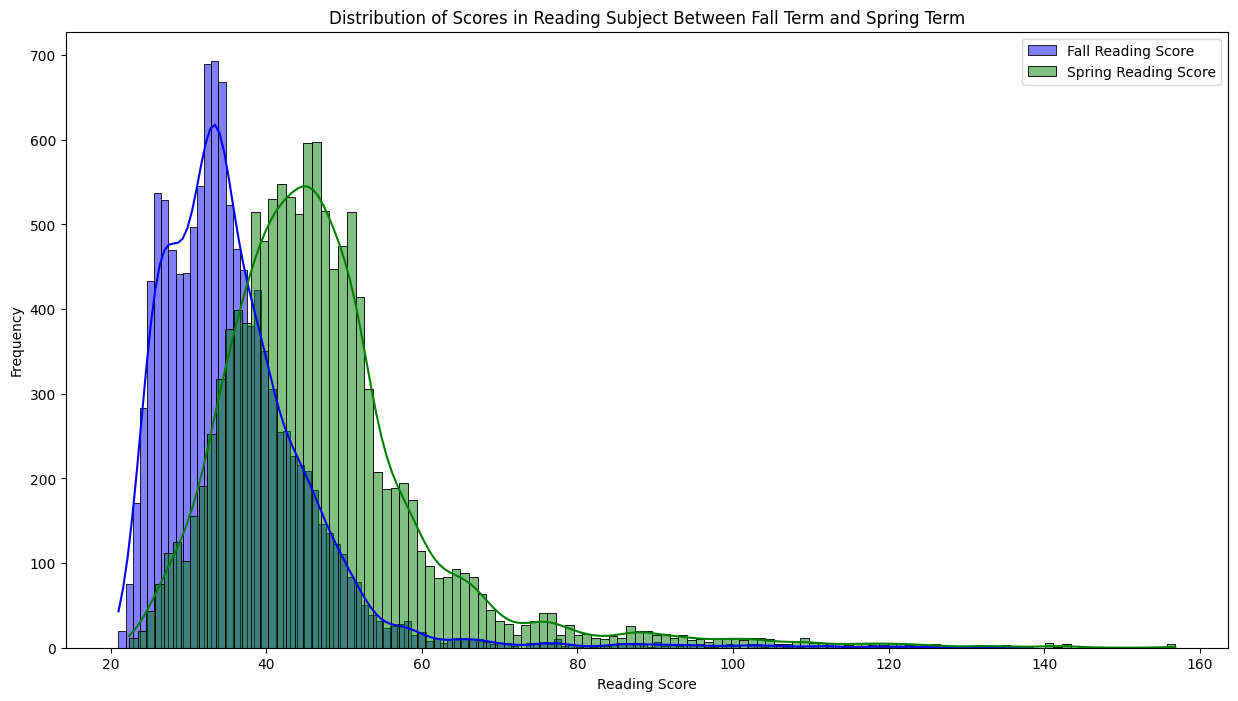

In [11]:
# Create distribution histogram of scores in Reading subject between fall term and spring term
plt.figure(figsize=(15, 8))
sns.histplot(df_clean['fallreadingscore'], color='blue', label='Fall Reading Score', kde=True)
sns.histplot(df_clean['springreadingscore'], color='green', label='Spring Reading Score', kde=True)
# Add title and lable for the histogram
plt.title('Distribution of Scores in Reading Subject Between Fall Term and Spring Term')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


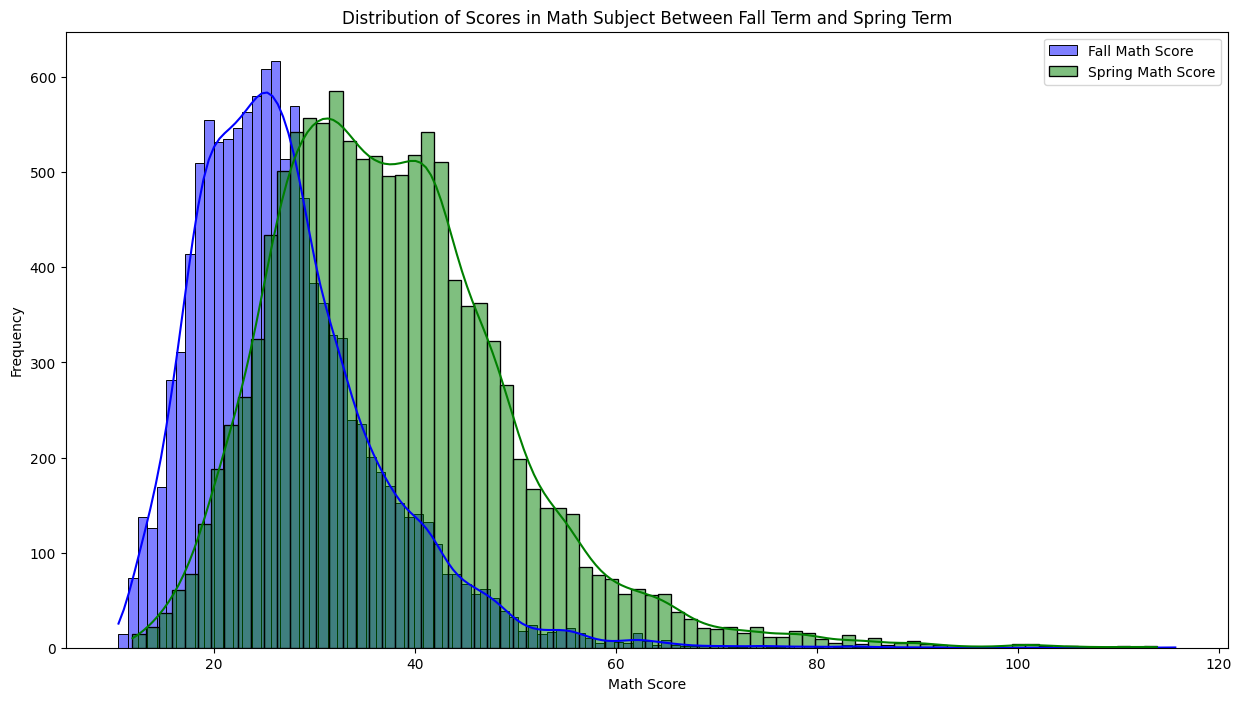

In [12]:
# Create distribution histogram of scores in Math subject between fall term and spring term
plt.figure(figsize=(15, 8))
sns.histplot(df_clean['fallmathscore'], color='blue', label='Fall Math Score', kde=True)
sns.histplot(df_clean['springmathscore'], color='green', label='Spring Math Score', kde=True)
# Add title and lable for the histogram
plt.title('Distribution of Scores in Math Subject Between Fall Term and Spring Term')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

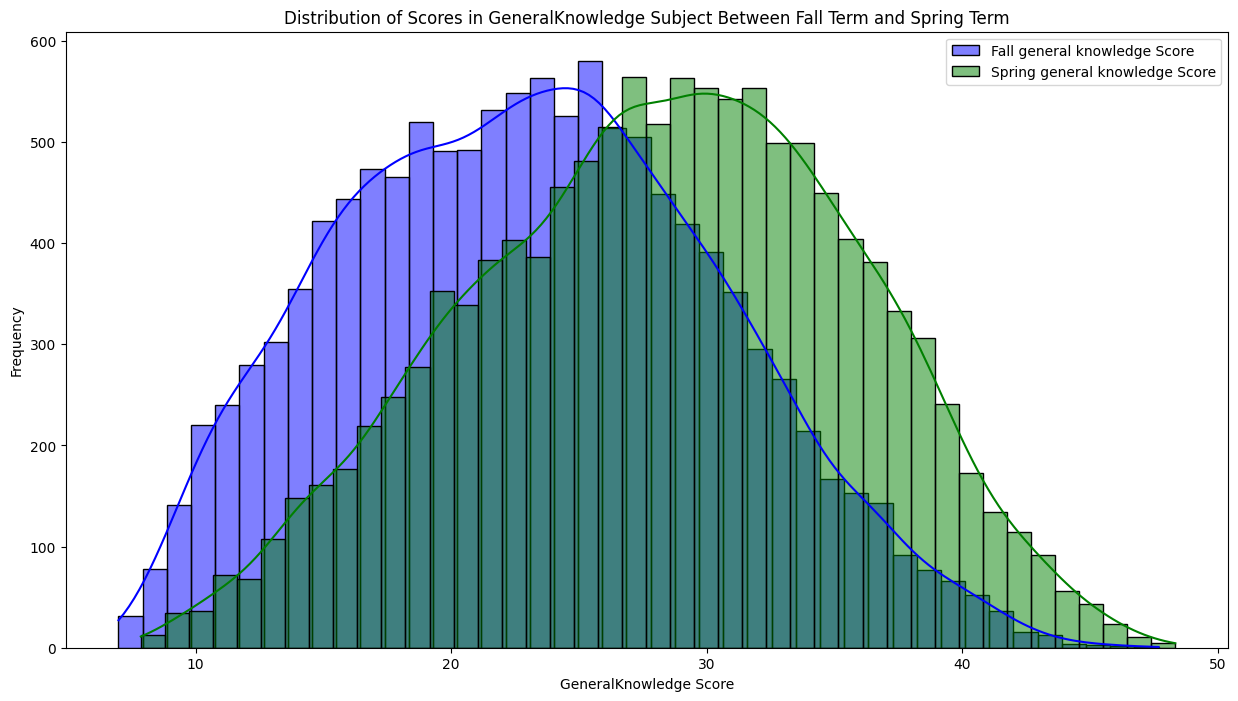

In [13]:
# Create distribution histogram of scores in GeneralKnowledge subject between fall term and spring term
plt.figure(figsize=(15, 8))
sns.histplot(df_clean['fallgeneralknowledgescore'], color='blue', label='Fall general knowledge Score', kde=True)
sns.histplot(df_clean['springgeneralknowledgescore'], color='green', label='Spring general knowledge Score', kde=True)
# Add title and lable for the histogram
plt.title('Distribution of Scores in GeneralKnowledge Subject Between Fall Term and Spring Term')
plt.xlabel('GeneralKnowledge Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Research Question 1: How does income group impact childrens' reading score in the spring term, after controlling their reading score in the fall term？

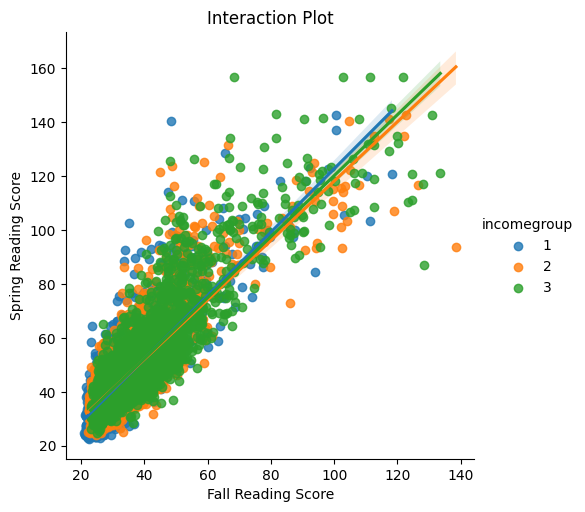

In [14]:
# Generate Interaction Plot for Reading scores between Spring term and Fall term by Income Group
sns.lmplot(x='fallreadingscore',y='springreadingscore',hue='incomegroup',data=df_clean)
# Add title and lable for the plot
plt.xlabel('Fall Reading Score')
plt.ylabel('Spring Reading Score')
plt.title('Interaction Plot')
# Show the plot
plt.show()

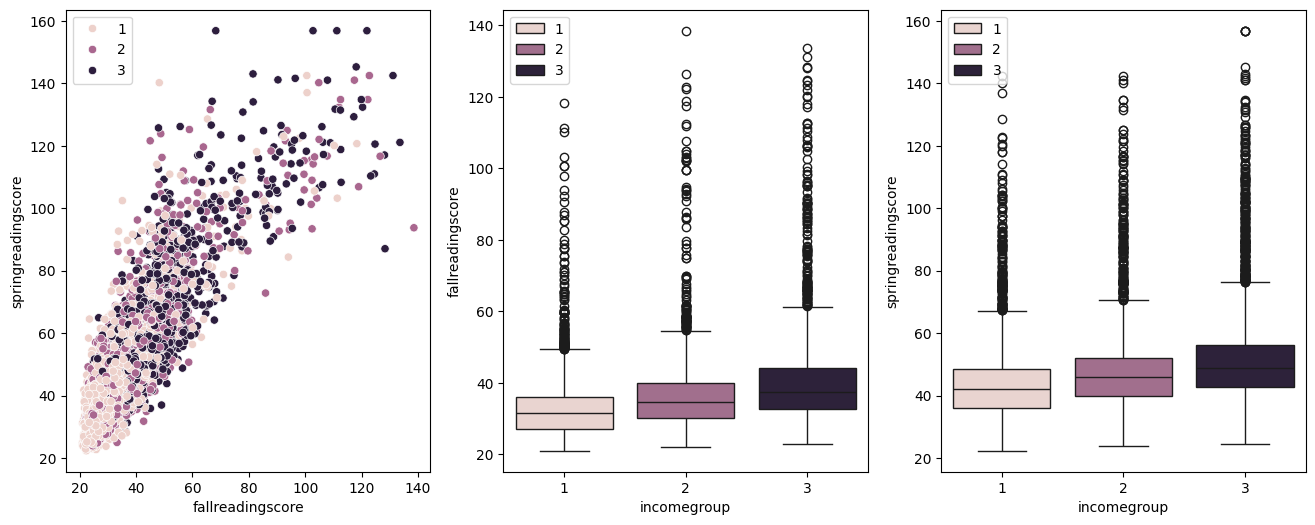

In [15]:
fig, axs = plt.subplots(ncols=3,figsize=(16, 6))
# Create Scatterplot of Reading Score between fall term and spring term for students in kindergarten by income group
sns.scatterplot(data=df_clean, x="fallreadingscore", y="springreadingscore", hue=df_clean.incomegroup.tolist(), ax=axs[0])
# Create Boxplot of Reading Score in fall term by income group
sns.boxplot(data=df_clean, x="incomegroup", y="fallreadingscore", hue=df_clean.incomegroup.tolist(), ax=axs[1])
# Create Boxplot of Reading Score in spring term by income group
sns.boxplot(data=df_clean, x="incomegroup", y="springreadingscore", hue=df_clean.incomegroup.tolist(), ax=axs[2])
plt.show()

In [16]:
# Ancova table for readingscore~incomegroup
ancova(data=df_clean, dv='springreadingscore', covar='fallreadingscore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,5.131201e+02,2,4.055660,0.017348,0.00068
1,fallreadingscore,1.547042e+06,1,24455.397576,0.000000,0.67214
2,Residual,7.546256e+05,11929,NaN,NaN,NaN


In [17]:
# Fit the ANCOVA model
model = sm.formula.ols('springreadingscore ~ fallreadingscore + C(incomegroup)', data=df_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     8929.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        03:19:43   Log-Likelihood:                -41675.
No. Observations:               11933   AIC:                         8.336e+04
Df Residuals:                   11929   BIC:                         8.339e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5430    

In [ ]:
# Fit the ANCOVA model with interaction term
model_interaction = sm.formula.ols('springreadingscore ~ fallreadingscore * C(incomegroup)', data=df_clean).fit()

# Print model summary
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     5367.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:17:29   Log-Likelihood:                -41667.
No. Observations:               11933   AIC:                         8.335e+04
Df Residuals:                   11927   BIC:                         8.339e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


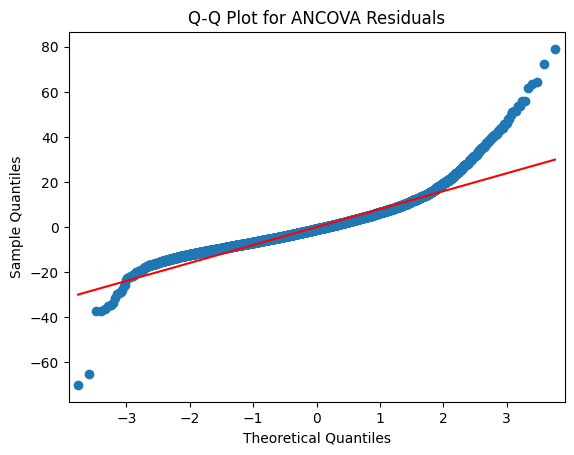

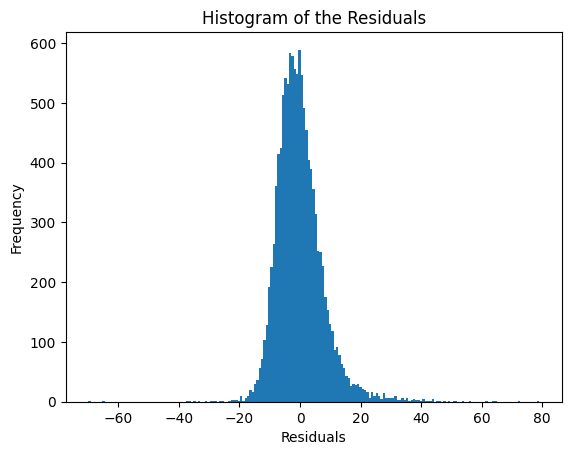

ShapiroResult(statistic=0.9119972586631775, pvalue=0.0)

In [ ]:
# Check Assuption 1: Normality of Residuals

# Create Q-Q plot of the residuals
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot for ANCOVA Residuals')
plt.show()

# Create Histogram of the residuals
plt.figure()
plt.hist(model.resid, bins='auto')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of the Residuals')
plt.show()

# The Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
shapiro_test

In [ ]:
# Check Assuption 2: Variances are homogenous
# Levene's test if the sample data is not normal distribution
res = stat()
res.levene(df=df_clean, res_var='springreadingscore', xfac_var='incomegroup')
res.levene_summary

,Parameter,Value
0,Test statistics (W),39.5528
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


In [ ]:
# Research Question 2: How does income group impact childrens' math score in the spring term, after controlling their math score in the fall term？

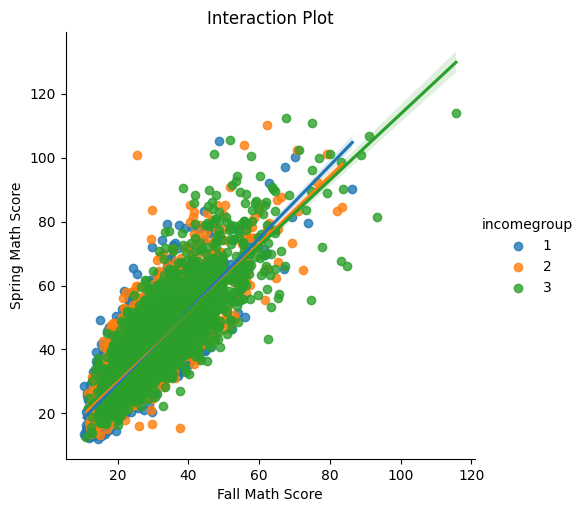

In [ ]:
# Generate Interaction Plot for Math scores between Spring term and Fall term by Income Group
sns.lmplot(x='fallmathscore',y='springmathscore',hue='incomegroup',data=df_clean)
# Add title and lable for the plot
plt.xlabel('Fall Math Score')
plt.ylabel('Spring Math Score')
plt.title('Interaction Plot')
# Show the plot
plt.show()

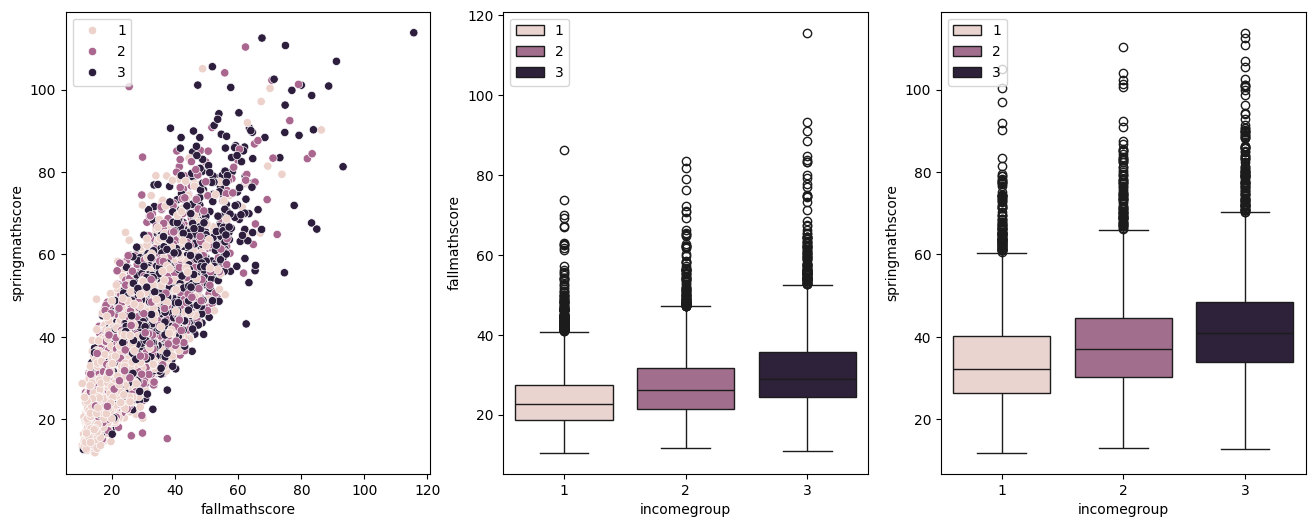

In [ ]:
fig, axs = plt.subplots(ncols=3,figsize=(16, 6))
# Create Scatterplot of Math Score between fall term and spring term for students in kindergarten by income group
sns.scatterplot(data=df_clean, x="fallmathscore", y="springmathscore", hue=df_clean.incomegroup.tolist(), ax=axs[0])
# Create Boxplot of Math Score in fall term by income group
sns.boxplot(data=df_clean, x="incomegroup", y="fallmathscore", hue=df_clean.incomegroup.tolist(), ax=axs[1])
# Create Boxplot of Math Score in spring term by income group
sns.boxplot(data=df_clean, x="incomegroup", y="springmathscore", hue=df_clean.incomegroup.tolist(), ax=axs[2])
plt.show()

In [ ]:
# Ancova table for mathscore~incomegroup
ancova(data=df_clean, dv='springmathscore', covar='fallmathscore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1.712758e+03,2,18.523585,9.284861e-09,0.003096
1,fallmathscore,1.026489e+06,1,22203.081238,0.000000e+00,0.650505
2,Residual,5.514994e+05,11929,NaN,NaN,NaN


In [ ]:
# Fit the ANCOVA model
model = sm.formula.ols('springmathscore ~ fallmathscore + C(incomegroup)', data=df_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     8469.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:25:30   Log-Likelihood:                -39804.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11929   BIC:                         7.965e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.2011    

In [ ]:
# Fit the ANCOVA model with interaction term
model_interaction = sm.formula.ols('springmathscore ~ fallmathscore * C(incomegroup)', data=df_clean).fit()

# Print model summary
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     5103.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:30:21   Log-Likelihood:                -39786.
No. Observations:               11933   AIC:                         7.958e+04
Df Residuals:                   11927   BIC:                         7.963e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

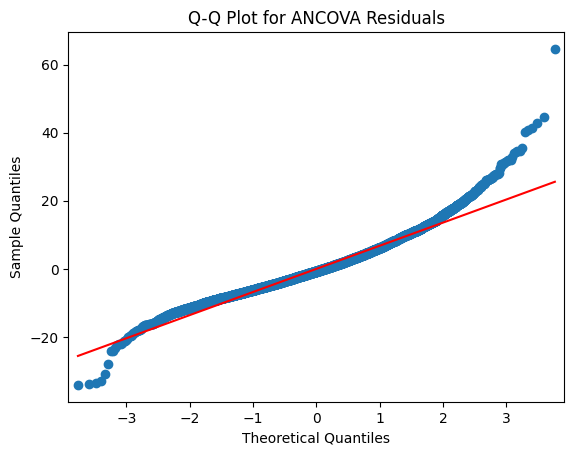

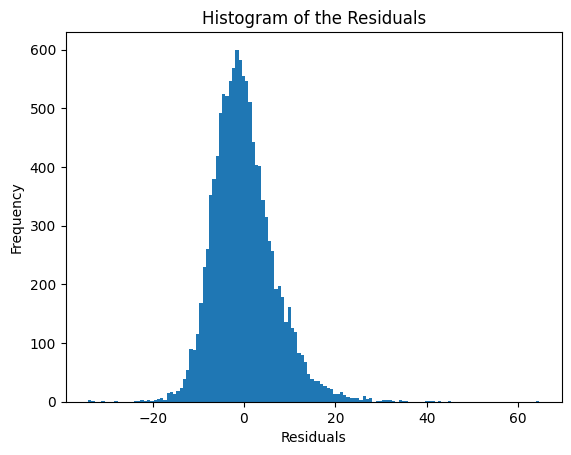

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9649319052696228, pvalue=0.0)

In [ ]:
# Check Assuption 1: Normality of Residuals

# Create Q-Q plot of the residuals
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot for ANCOVA Residuals')
plt.show()

# Create Histogram of the residuals
plt.figure()
plt.hist(model.resid, bins='auto')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of the Residuals')
plt.show()

# The Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
shapiro_test

In [ ]:
# Check Assuption 2: Variances are homogenous
# Levene's test if the sample data is not normal distribution
res = stat()
res.levene(df=df_clean, res_var='springmathscore', xfac_var='incomegroup')
print(res.levene_summary)

                 Parameter    Value
0      Test statistics (W)  18.8999
1  Degrees of freedom (Df)   2.0000
2                  p value   0.0000


In [ ]:
# Research Question 3: How does income group impact childrens' generalknowledge score in the spring term, after controlling their generalknowledge score in the fall term？

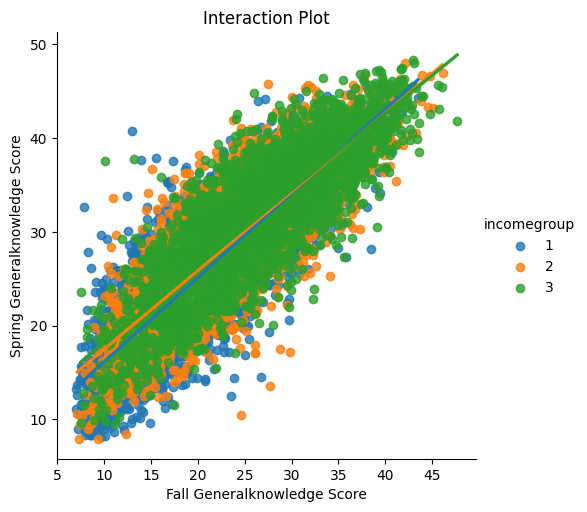

In [ ]:
# Generate Interaction Plot for Generalknowledge scores between Spring term and Fall term by Income Group
sns.lmplot(x='fallgeneralknowledgescore',y='springgeneralknowledgescore',hue='incomegroup',data=df_clean)
# Add title and lable for the plot
plt.xlabel('Fall Generalknowledge Score')
plt.ylabel('Spring Generalknowledge Score')
plt.title('Interaction Plot')
# Show the plot
plt.show()

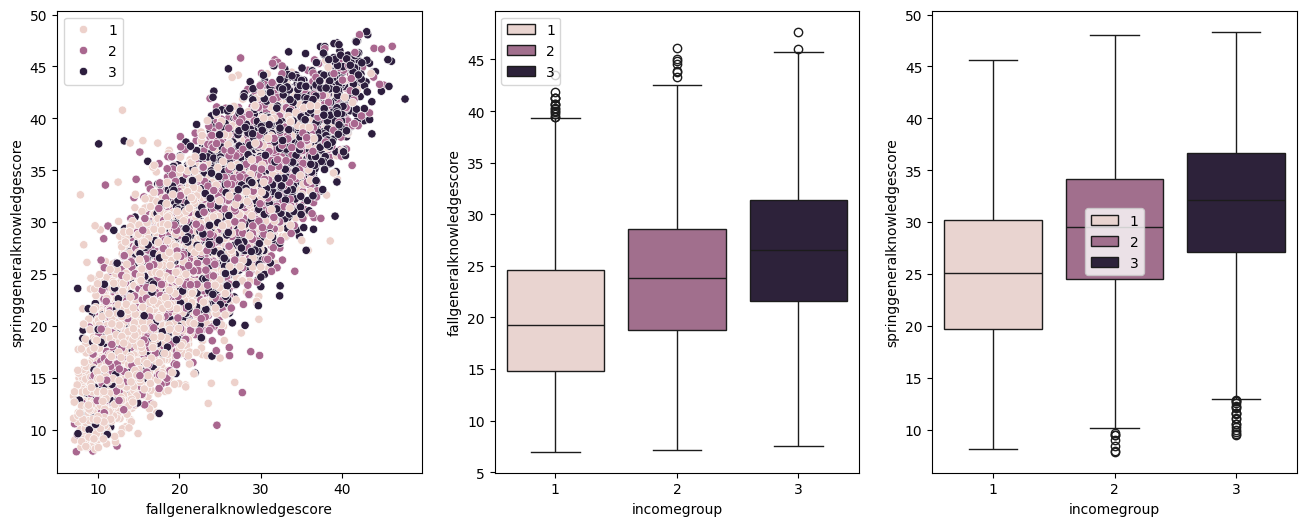

In [ ]:
fig, axs = plt.subplots(ncols=3,figsize=(16, 6))
# Create Scatterplot of Generalknowledge Score between fall term and spring term for students in kindergarten by income group
sns.scatterplot(data=df_clean, x="fallgeneralknowledgescore", y="springgeneralknowledgescore", hue=df_clean.incomegroup.tolist(), ax=axs[0])
# Create Boxplot of Generalknowledge Score in fall term by income group
sns.boxplot(data=df_clean, x="incomegroup", y="fallgeneralknowledgescore", hue=df_clean.incomegroup.tolist(), ax=axs[1])
# Create Boxplot of Generalknowledge Score in spring term by income group
sns.boxplot(data=df_clean, x="incomegroup", y="springgeneralknowledgescore", hue=df_clean.incomegroup.tolist(), ax=axs[2])
plt.show()

In [18]:
# Ancova table for generalknowledgescore~incomegroup
ancova(data=df_clean, dv='springgeneralknowledgescore', covar='fallgeneralknowledgescore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1756.904469,2,56.908040,2.525291e-25,0.009451
1,fallgeneralknowledgescore,411876.768316,1,26682.269841,0.000000e+00,0.691049
2,Residual,184140.179925,11929,NaN,NaN,NaN


In [ ]:
# Fit the ANCOVA model
model = sm.formula.ols('springgeneralknowledgescore ~ fallgeneralknowledgescore + C(incomegroup)', data=df_clean).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.731
Model:                                     OLS   Adj. R-squared:                  0.731
Method:                          Least Squares   F-statistic:                 1.082e+04
Date:                         Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                                 20:46:51   Log-Likelihood:                -33259.
No. Observations:                        11933   AIC:                         6.653e+04
Df Residuals:                            11929   BIC:                         6.656e+04
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [ ]:
# Fit the ANCOVA model with interaction term
model_interaction = sm.formula.ols('springgeneralknowledgescore ~ fallgeneralknowledgescore * C(incomegroup)', data=df_clean).fit()

# Print model summary
print(model_interaction.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.732
Model:                                     OLS   Adj. R-squared:                  0.732
Method:                          Least Squares   F-statistic:                     6524.
Date:                         Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                                 20:46:56   Log-Likelihood:                -33236.
No. Observations:                        11933   AIC:                         6.648e+04
Df Residuals:                            11927   BIC:                         6.653e+04
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------

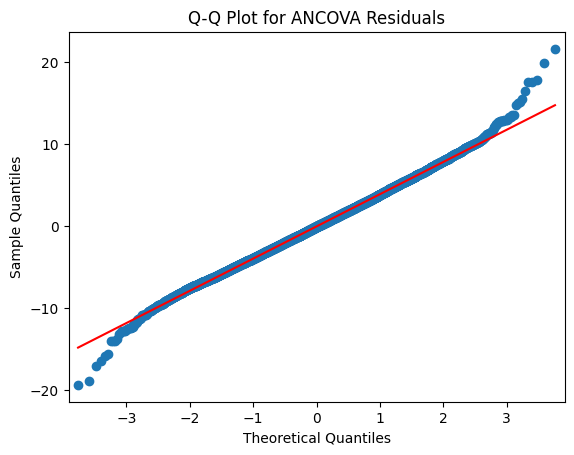

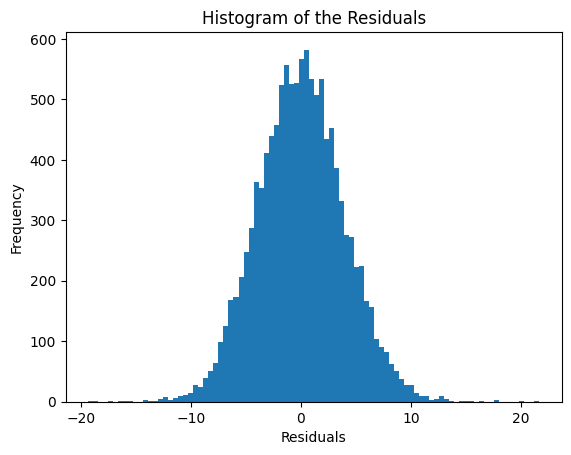

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9980394840240479, pvalue=3.155014791089705e-11)

In [ ]:
# Check Assuption 1: Normality of Residuals

# Create Q-Q plot of the residuals
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot for ANCOVA Residuals')
plt.show()

# Create Histogram of the residuals
plt.figure()
plt.hist(model.resid, bins='auto')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of the Residuals')
plt.show()

# The Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
shapiro_test

In [ ]:
# Check Assuption 2: Variances are homogenous
# Levene's test if the sample data is not normal distribution
res = stat()
res.levene(df=df_clean, res_var='springgeneralknowledgescore', xfac_var='incomegroup')
print(res.levene_summary)

                 Parameter   Value
0      Test statistics (W)  9.4058
1  Degrees of freedom (Df)  2.0000
2                  p value  0.0001
